In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import missingno as msno

In [2]:
# Set up folder with data:
os.chdir('D:\\00_PROJECTS_sripts_code\\Credit_Risk')

In [3]:
#%% Function to extract code from GitHub:
def GetGitHubCode(GitUrl):

    response = requests.get(GitUrl) #get data from json file located at specified URL 

    if response.status_code == requests.codes.ok:
        contentOfUrl = response.content
        exec(contentOfUrl, globals() )
    else:
        print('Content was not found.')

In [4]:
###################
#%% Read data
###################

In [5]:
credit_risk_data = pd.read_csv('credit_risk_dataset.csv')

In [6]:
##########################################################
##########################################################
#%% Brief check data
##########################################################
##########################################################

In [7]:
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
### Select all numerical and string variables:
numeric_columns = credit_risk_data.select_dtypes(exclude=['object']).columns
categorical_columns = credit_risk_data.select_dtypes(include=['object']).columns

In [9]:
##########################################################
##########################################################
#%% Remove Outliers
##########################################################
##########################################################

In [10]:
"""
To remove outlier I check data visually to detect strange values for selected variable


Alternatives:

Automatic outlier remove based on standard deviation - remove outsie 3*std
Exemple - Replace outliers which are > 3*std with median:

def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()  

"""

'\nTo remove outlier I check data visually to detect strange values for selected variable\n\n\nAlternatives:\n\nAutomatic outlier remove based on standard deviation - remove outsie 3*std\nExemple - Replace outliers which are > 3*std with median:\n\ndef replace_outliers(series):\n    # Calculate the absolute difference of each timepoint from the series mean\n    absolute_differences_from_mean = np.abs(series - np.mean(series))\n    \n    # Calculate a mask for the differences that are > 3 standard deviations from zero\n    this_mask = absolute_differences_from_mean > (np.std(series) * 3)\n    \n    # Replace these values with the median accross the data\n    series[this_mask] = np.nanmedian(series)\n    return series\n\n# Apply your preprocessing function to the timeseries and plot the results\nprices_perc = prices_perc.apply(replace_outliers)\nprices_perc.loc["2014":"2015"].plot()\nplt.show()  \n\n'

In [11]:
### Show variables disribution 

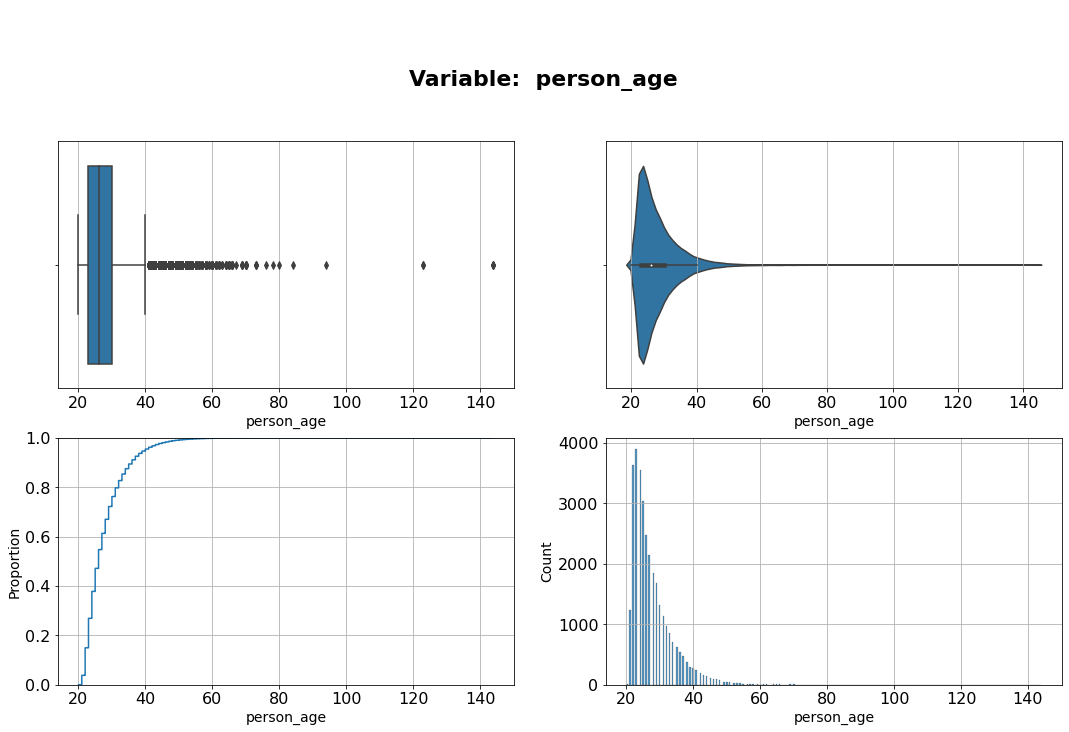

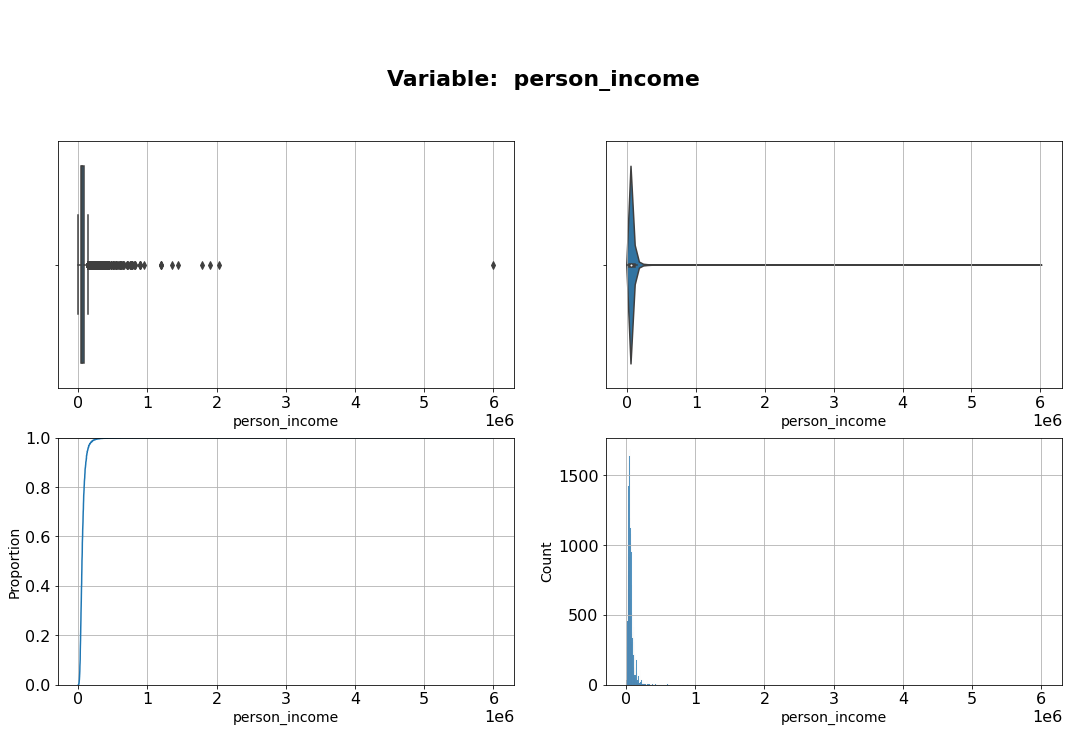

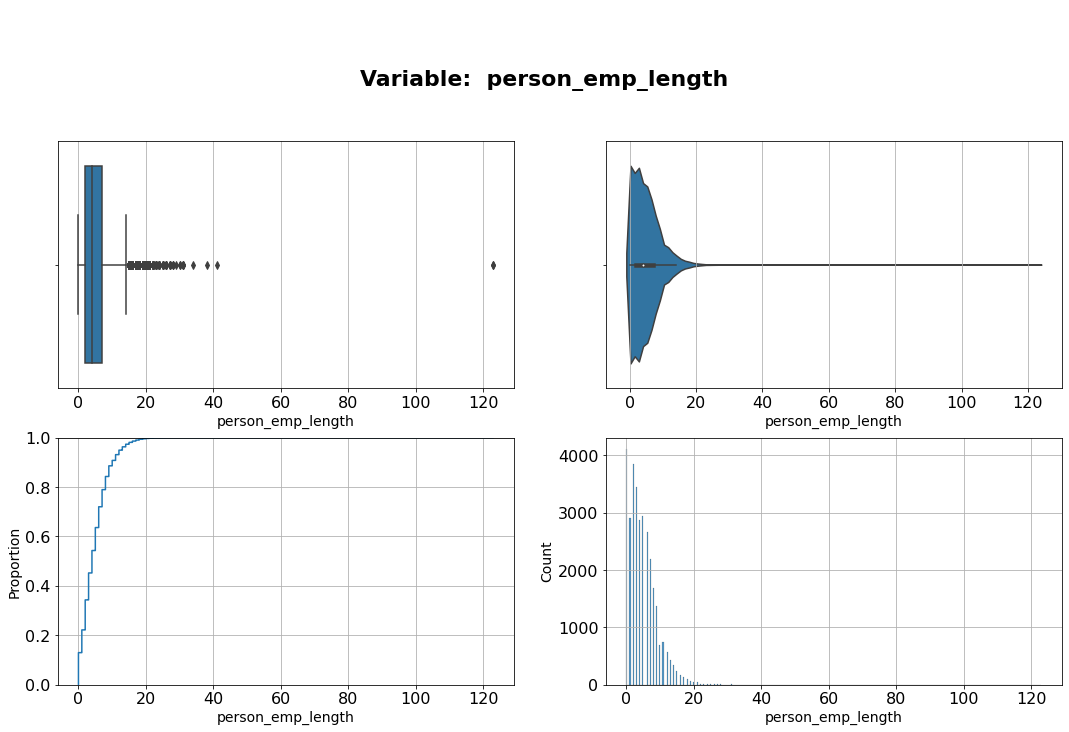

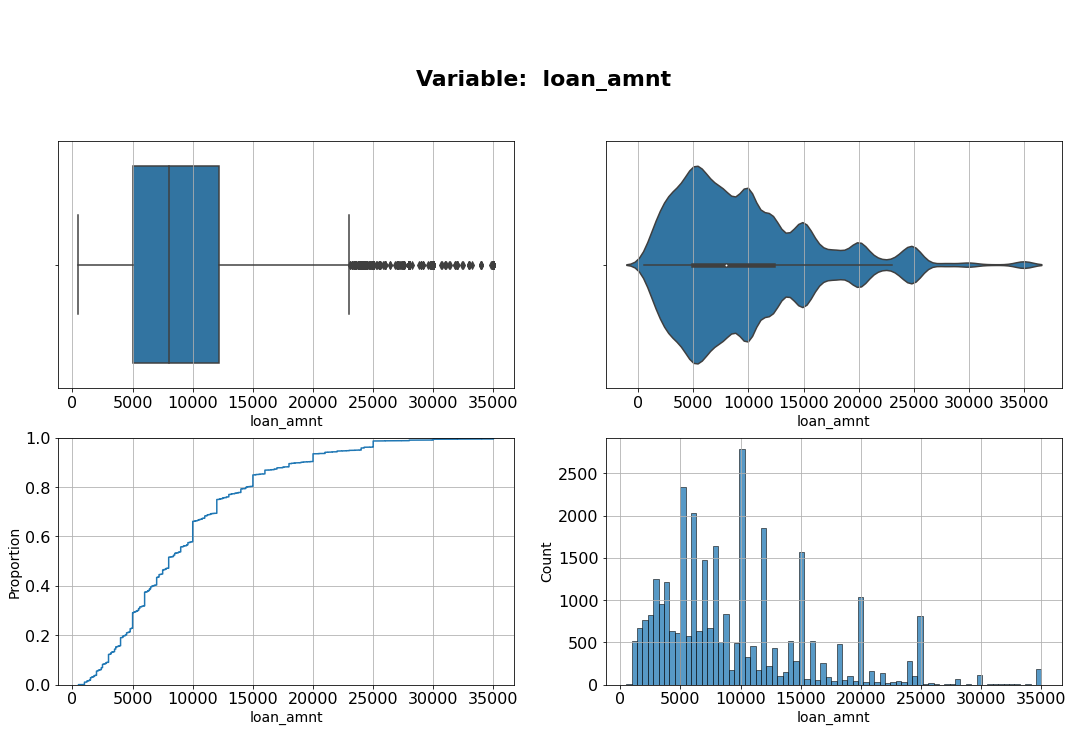

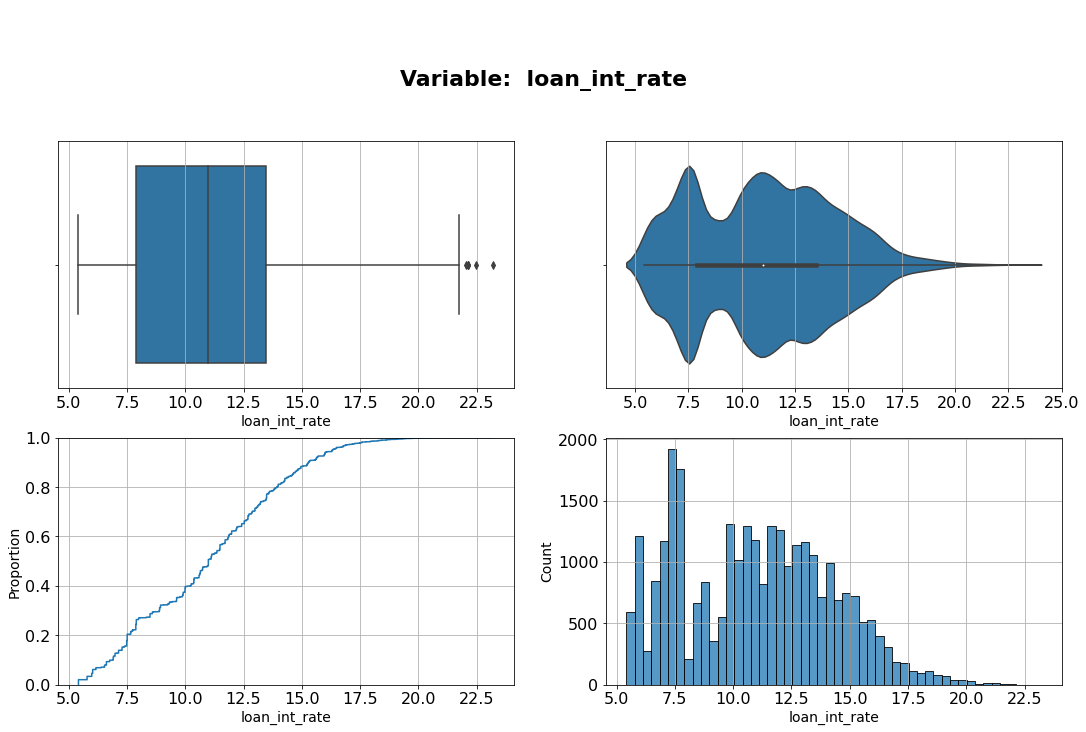

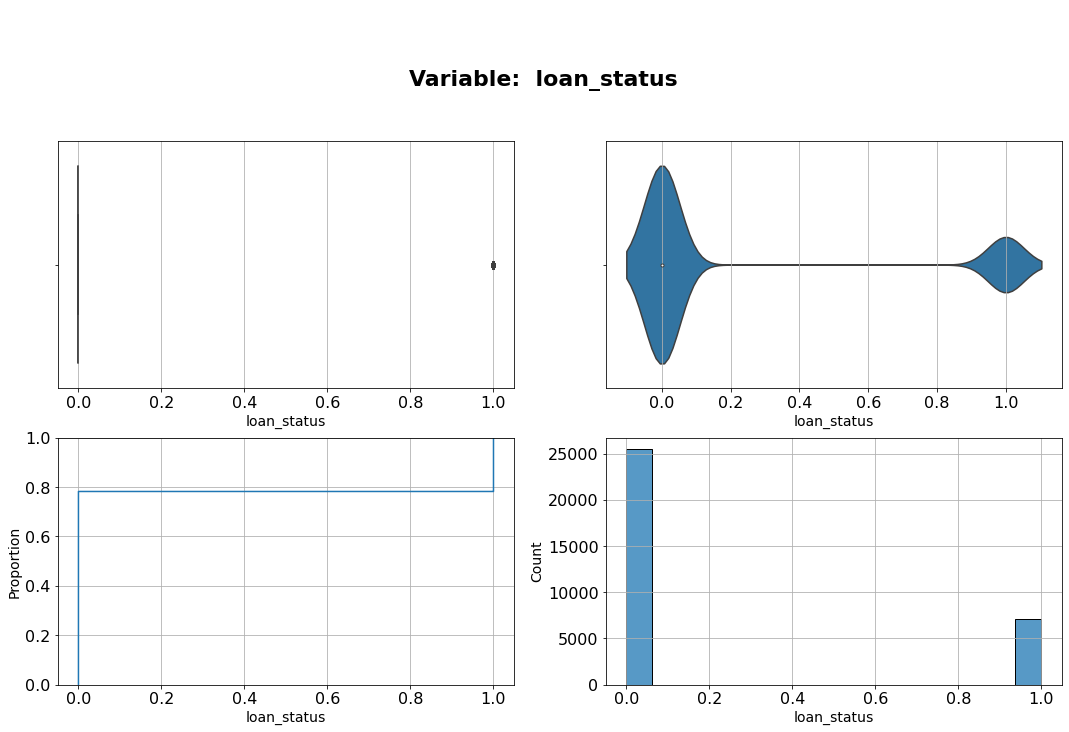

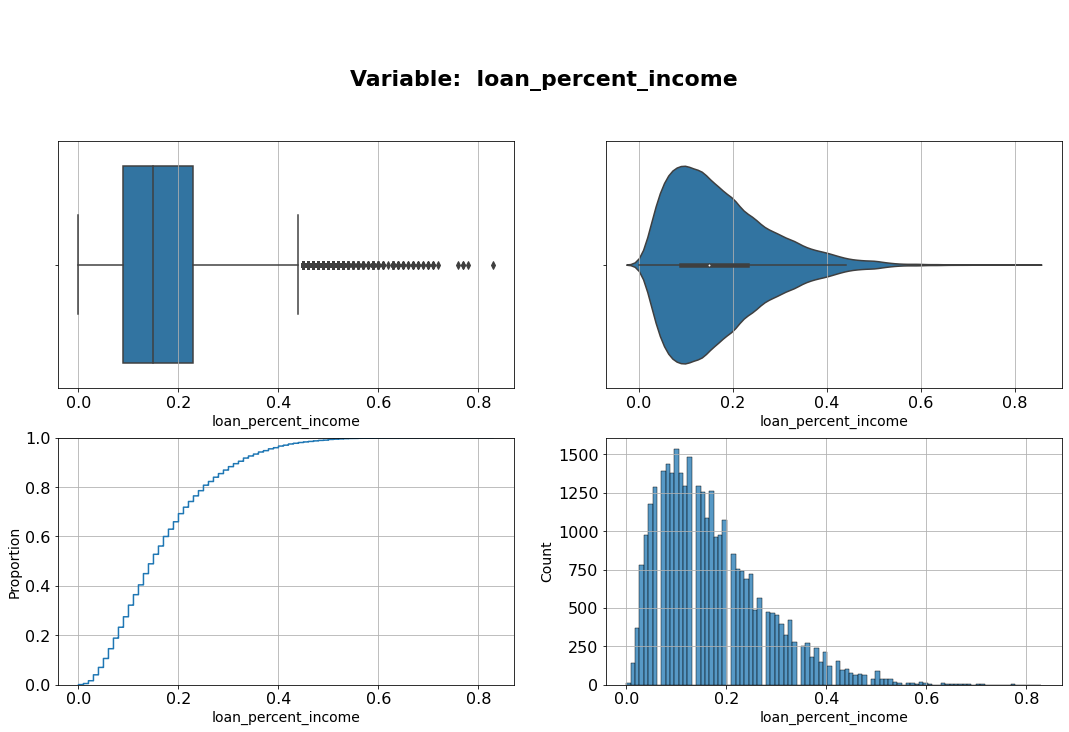

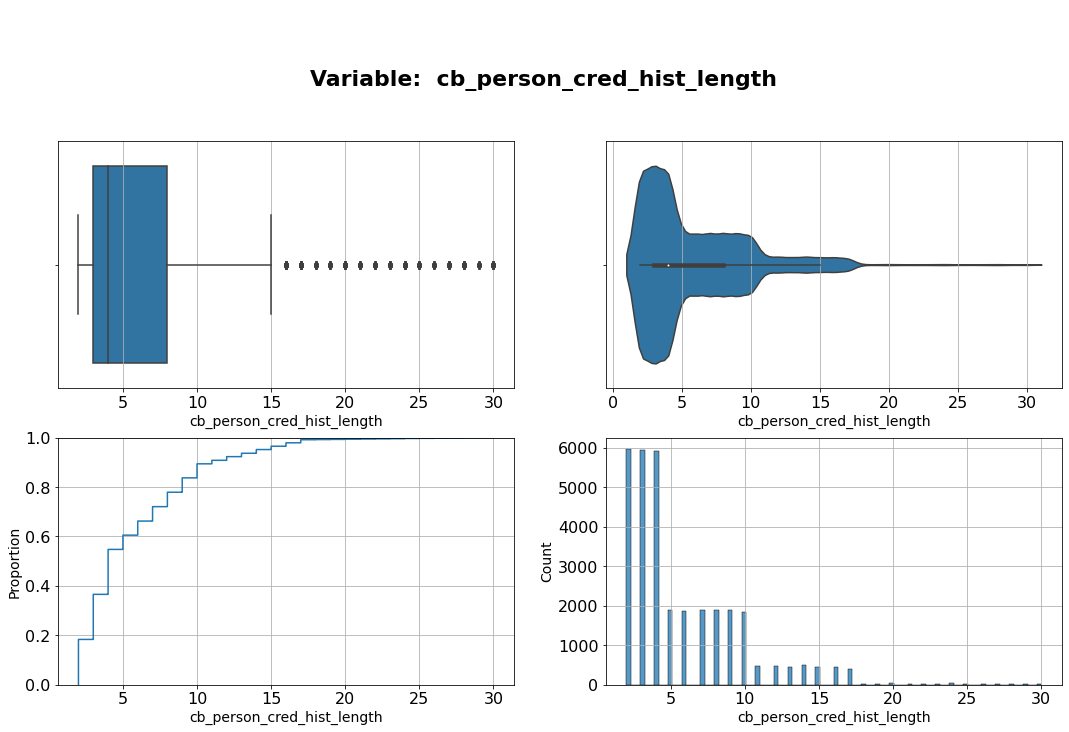

In [12]:
%matplotlib inline
from IPython import display

fontsize_title = 22
fontsize_ticks = 16
fontsize_axis_label = 14

plt.rcParams['xtick.labelsize'] = fontsize_ticks
plt.rcParams['ytick.labelsize'] = fontsize_ticks
plt.rcParams['axes.labelsize'] = fontsize_axis_label
plt.rcParams['axes.grid'] = True

for column in numeric_columns:
    fig, axs = plt.subplots(nrows = 2,ncols=2, figsize=(18, 10))
    sns.boxplot(data=credit_risk_data, x=column, dodge=False, ax=axs[0,0])
    sns.violinplot(data=credit_risk_data, x=column, dodge=False, ax=axs[0,1])
    sns.ecdfplot(data=credit_risk_data, x=column,  ax=axs[1,0])
    sns.histplot(data=credit_risk_data, x=column,  ax=axs[1,1])
    plt.suptitle('Variable:  ' + column, fontsize = fontsize_title, fontweight="bold")
    plt.figtext(0.5, 1.0, '     ', ha='center', va='bottom', fontsize = '50')

plt.show()

In [13]:
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:
#  max from 'person_age' is 144, what is impossible
#
# max from 'person_emp_length' is 123, what is impossible

In [15]:
# look at 'person_age' closer, to select appropriate limit

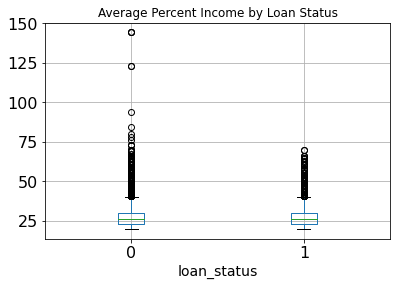

In [16]:
credit_risk_data.boxplot(column = ['person_age'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

<AxesSubplot:xlabel='person_age', ylabel='loan_amnt'>

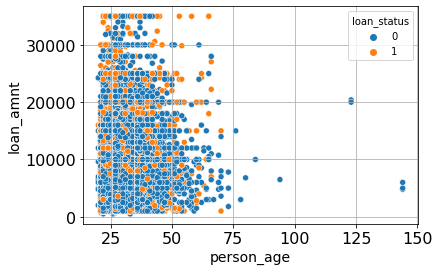

In [17]:
sns.scatterplot(x="person_age", y="loan_amnt",
              hue="loan_status",
              data=credit_risk_data)

In [18]:
credit_risk_data.query('65< person_age < 100').sort_values('person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32305,66,300000,MORTGAGE,3.0,PERSONAL,A,28000,6.62,0,0.09,N,23
32484,66,82000,MORTGAGE,8.0,PERSONAL,A,28000,7.90,0,0.34,N,20
32440,66,54000,RENT,3.0,MEDICAL,D,8000,16.02,0,0.15,Y,26
32426,66,40000,RENT,2.0,EDUCATION,E,7000,15.68,1,0.17,Y,29
32423,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,24
32361,66,38400,RENT,14.0,MEDICAL,A,11000,5.42,0,0.29,N,19
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30
32309,66,60000,RENT,4.0,MEDICAL,C,27050,NaN,1,0.45,Y,28
32317,66,43000,RENT,17.0,DEBTCONSOLIDATION,D,22250,14.59,1,0.52,Y,23
32542,67,200000,MORTGAGE,2.0,PERSONAL,C,3000,10.28,0,0.01,N,26


In [19]:
# based on observation we can conlcude that columns: person_age, person_emp_length contains outiers.
# Folowing limits were applied:
#
# person_age < 100
# person_emp_length < 100

In [20]:
analysis_data = credit_risk_data.copy()\
                    .query('person_age < 100')\
                    .query('person_emp_length < 100')

In [21]:
#######################################################################
# 'loan_percent_income' is also worth to check, due to some big values.
# However, it may happend, when f.e. somebody take credit and all family repay it

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_amnt'>

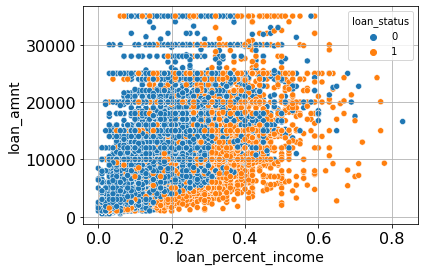

In [22]:
sns.scatterplot(x="loan_percent_income", y="loan_amnt",
                hue="loan_status",
                data=credit_risk_data)

In [ ]:
##########################################################
##########################################################
#%% Deal with NA
##########################################################
##########################################################

In [23]:
'''
There are 3 types of NA
- Missing completely at random (MCAR) - there are error in the data entry process, f.e error in machine which perform test
- Missing at random (MAR) - Missing data are not randomly distributed but they are accounted for by other observed variables.
                            MAR are not actually missing at random.
                            F.e. pepole with high salary very often don't fill value about it.
                            
- Missing not at random (MNAR) - are missing for reasons related to the values themselves.
                                F.e. survey about holiday spending, in some participants with low incomes 
                                avoid reporting their holiday spending amounts because they are low.
                                Or peeople with deep depresion don't fill survy about depresion.

This type of missing data is important to look for because you may lack data from key subgroups within your sample.
Your sample may not end up being representative of your population.

In practice, you can often consider two types of missing data ignorable because the missing data don’t systematically 
differ from your observed values:

    MCAR data
    MAR data

For these two data types, the likelihood of a data point being missing has nothing to do with the value itself.
So it’s unlikely that your missing values are significantly different from your observed values.

On the flip side, you have a biased dataset if the missing data systematically differ from your observed data.
Data that are MNAR are called non-ignorable for this reason.



There are few possibilities to deal with NA:
- remove - when missing data are Completely at Random 
- replace (imputation) - with mean, median, most frequent value (in case of categorical) or a ML technique.
          Sometimes together with imputation is good to create new columns to mark NA values.


'''

"\nThere are 3 types of NA\n- Missing completely at random (MCAR) - there are error in the data entry process, f.e error in machine which perform test\n- Missing at random (MAR) - Missing data are not randomly distributed but they are accounted for by other observed variables.\n                            MAR are not actually missing at random.\n                            F.e. pepole with high salary very often don't fill value about it.\n                            \n- Missing not at random (MNAR) - are missing for reasons related to the values themselves.\n                                F.e. survey about holiday spending, in some participants with low incomes \n                                avoid reporting their holiday spending amounts because they are low.\n                                Or peeople with deep depresion don't fill survy about depresion.\n\nThis type of missing data is important to look for because you may lack data from key subgroups within your sample.\nYour sa

In [24]:
# show numbers of NA
analysis_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

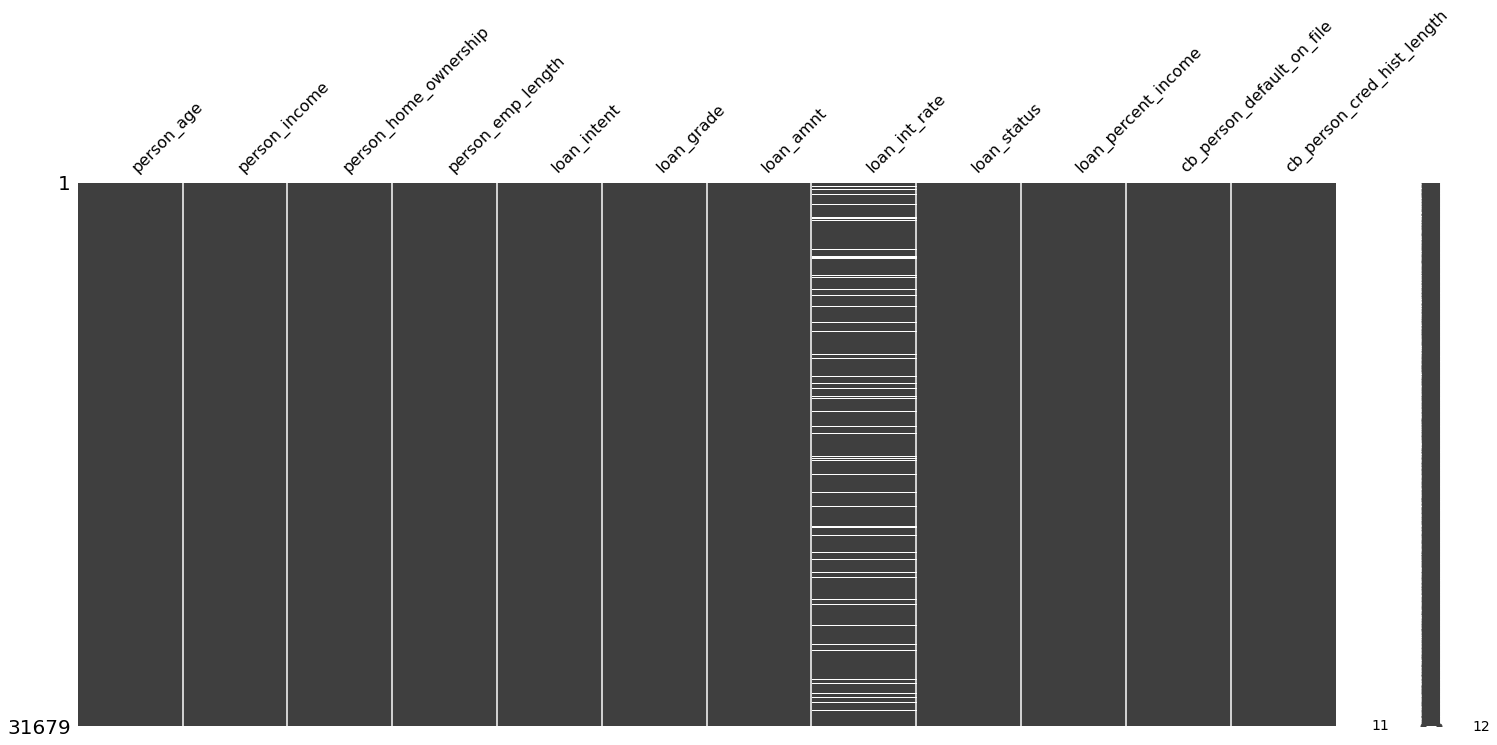

In [25]:
msno.matrix(analysis_data)

In [26]:
# loan initial rate is filling with mean value
analysis_data['loan_int_rate'].fillna(value=analysis_data['loan_int_rate'].mean(), inplace=True)

In [27]:
analysis_data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [28]:
##########################################################
##########################################################
#%% Save Prepared Data
##########################################################
##########################################################

In [29]:
analysis_data.to_csv('analysis_data.csv', index=False)